In [1]:
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import jarque_bera
import statsmodels
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline 

# 데이터 불러오기

In [2]:
data = pd.read_csv('C:/Users/ST-USER/Desktop/데이터분석 깃허브 업로드용/코로나_2020-04/coviddata_after_deleting_without residual.csv')
data1 = pd.read_csv('C:/Users/ST-USER/Desktop/데이터분석 깃허브 업로드용/코로나_2020-04/coviddata_after_deleting.csv')

In [3]:
data.head()

,time,const,dependent,ln_dep,dep_t3,ln_dep_t3,dep_t5,ln_dep_t5,dep_t6,dependent_t7,...,traffic,ln_traff,Retail_rec,ln_rec,Park,ln_park,Transit,ln_trans,mask,ln_mask
0,2020-01-20,1.0,1,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,...,7301127.0,15.803539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-21,1.0,0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,...,7308268.0,15.804517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-22,1.0,0,0.0,0.0,0.0,1.0,0.000000,0.0,3.0,...,7484876.0,15.828395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-23,1.0,0,0.0,1.0,0.0,0.0,0.000000,3.0,3.0,...,8275536.0,15.928814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-24,1.0,1,0.0,1.0,0.0,3.0,1.098612,3.0,4.0,...,8928776.0,16.004790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.tail()

,time,const,dependent,ln_dep,dep_t3,ln_dep_t3,dep_t5,ln_dep_t5,dep_t6,dependent_t7,...,traffic,ln_traff,Retail_rec,ln_rec,Park,ln_park,Transit,ln_trans,mask,ln_mask
102,2020-05-05,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.4,NaN
103,2020-05-06,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1882.2,NaN
104,2020-05-07,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,2020-05-08,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,2020-05-09,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


중간에 빈 데이터를 잘라내자

In [5]:
data_drop_row1 = data.dropna(axis=0)

In [6]:
data_drop_row1

,time,const,dependent,ln_dep,dep_t3,ln_dep_t3,dep_t5,ln_dep_t5,dep_t6,dependent_t7,...,traffic,ln_traff,Retail_rec,ln_rec,Park,ln_park,Transit,ln_trans,mask,ln_mask
23,2020-02-15,1.0,0,0.000000,1.0,0.000000,53.0,3.970292,1.0,229.0,...,7720567.0,15.859398,96.0,4.564348,103.0,4.634729,94.0,4.543295,800.0,6.684612
24,2020-02-16,1.0,1,0.000000,20.0,2.995732,100.0,4.605170,20.0,169.0,...,5824945.0,15.577660,89.0,4.488636,69.0,4.234107,85.0,4.442651,595.0,6.388561
25,2020-02-17,1.0,1,0.000000,53.0,3.970292,229.0,5.433722,53.0,231.0,...,6311019.0,15.657808,93.0,4.532599,83.0,4.418841,94.0,4.543295,1173.0,7.067320
26,2020-02-18,1.0,1,0.000000,100.0,4.605170,169.0,5.129899,100.0,144.0,...,6578861.0,15.699372,99.0,4.595120,95.0,4.553877,97.0,4.574711,1194.0,7.085064
27,2020-02-19,1.0,20,2.995732,229.0,5.433722,231.0,5.442418,229.0,284.0,...,6850900.0,15.739891,95.0,4.553877,114.0,4.736198,96.0,4.564348,1297.0,7.167809
28,2020-02-20,1.0,53,3.970292,169.0,5.129899,144.0,4.969813,169.0,505.0,...,6923432.0,15.750422,93.0,4.532599,107.0,4.672829,94.0,4.543295,1292.0,7.163947
29,2020-02-21,1.0,100,4.605170,231.0,5.442418,284.0,5.648974,231.0,571.0,...,7353260.0,15.810654,85.0,4.442651,90.0,4.499810,90.0,4.499810,1323.0,7.187657
30,2020-02-22,1.0,229,5.433722,144.0,4.969813,505.0,6.224558,144.0,813.0,...,6265468.0,15.650564,74.0,4.304065,68.0,4.219508,76.0,4.330733,890.0,6.791221
31,2020-02-23,1.0,169,5.129899,284.0,5.648974,571.0,6.347389,284.0,1062.0,...,5087825.0,15.442361,69.0,4.234107,88.0,4.477337,75.0,4.317488,682.0,6.525030
32,2020-02-24,1.0,231,5.442418,505.0,6.224558,813.0,6.700731,505.0,600.0,...,6384923.0,15.669450,79.0,4.369448,106.0,4.663439,85.0,4.442651,1225.0,7.110696


In [7]:
#이게 우리가 원래 보려던 원시 모델 

reg = sm.OLS.from_formula("dependent_t7 ~ dep_t6 + message + test_daily + bus + traffic + mask", data_drop_row1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           dependent_t7   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     6.382
Date:                Tue, 11 May 2021   Prob (F-statistic):           0.000131
Time:                        22:56:45   Log-Likelihood:                -271.26
No. Observations:                  42   AIC:                             556.5
Df Residuals:                      35   BIC:                             568.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.0085    347.020      0.280      0.781    -607.479     801.496
dep_t6         0.0580      0.223      0.260      0.796      -0.394       0.510
message        2.0136      0.760      2.651      0.012       0.472       3.556
test_daily    -0.0336      0.008     -4.421      0.000      -0.049      -0.018
bus         1.621e-05   3.05e-05      0.531      0.599   -4.57e-05    7.82e-05
traffic     2.178e-05   5.57e-05      0.391      0.698   -9.13e-05       0.000
mask          -0.0548      0.084     -0.656      0.516      -0.225       0.115
==============================================================================
Omnibus:                       17.377   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.896
Skew:                           1.297   Prob(JB):                     1.07e-05
Kurtosis:                       5.521   Cond. No.                     9.72e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

그러나 bus는 서울 데이터이기 때문에, 모델 다른 변수들의 populoation과 다르다. 따라서 bus 대신 구글 데이터 중 Transit으로 바꾼다. 

In [8]:
#그런데 condition number가 1.58e+08로 매우 크게 나온다. 의심되는 muticollinearity를 확인하기 위해 VIF를 보자.
reg_1 = smf.ols('dependent_t7 ~ dep_t6 + message + traffic + Transit + mask + test_daily', data=data_drop_row1).fit()
print(reg_1.summary())
jarque_bera(reg_1.resid)

                            OLS Regression Results                            
Dep. Variable:           dependent_t7   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     6.285
Date:                Tue, 11 May 2021   Prob (F-statistic):           0.000149
Time:                        22:56:51   Log-Likelihood:                -271.43
No. Observations:                  42   AIC:                             556.9
Df Residuals:                      35   BIC:                             569.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    118.1296    648.766      0.182      0.8

(20.593041775390216,
 3.375031228852846e-05,
 1.2441895401228582,
 5.36123315157051)

In [9]:
#VIF 결과 -> Multicollinearity가 없다.

y, X = dmatrices('dependent_t7 ~ dep_t6 + message + test_daily + Transit + traffic + mask', data_drop_row1, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif.round(1)

,VIF Factor,features
0,612.8,Intercept
1,4.1,dep_t6
2,6.8,message
3,2.5,test_daily
4,5.3,Transit
5,2.9,traffic
6,2.0,mask


In [10]:
#그리고 위 OLS에서 떴던 warning 중 condition number 문제를 해결하기 위해 Standard Scaling을 해주자.

from sklearn.preprocessing import StandardScaler

df1 = data_drop_row1
del df1['time']

std_scaler = StandardScaler()
std_scale = std_scaler.fit_transform(df1)
std_scale = pd.DataFrame(std_scale, columns = df1.columns, index=list(df1.index.values))
#std_scale

reg_3 = smf.ols('dependent_t7 ~ dep_t6 + message + traffic + Transit + mask + test_daily', data=std_scale).fit()
print(reg_3.summary())


# condition number 문제 해결!

                            OLS Regression Results                            
Dep. Variable:           dependent_t7   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     6.140
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           0.000195
Time:                        14:42:57   Log-Likelihood:                -43.128
No. Observations:                  41   AIC:                             100.3
Df Residuals:                      34   BIC:                             112.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.327e-17      0.119   7.01e-16      1.0

Text(0.5, 1.0, 'residual')

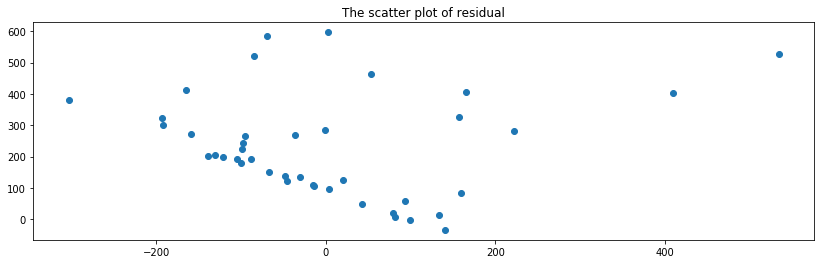

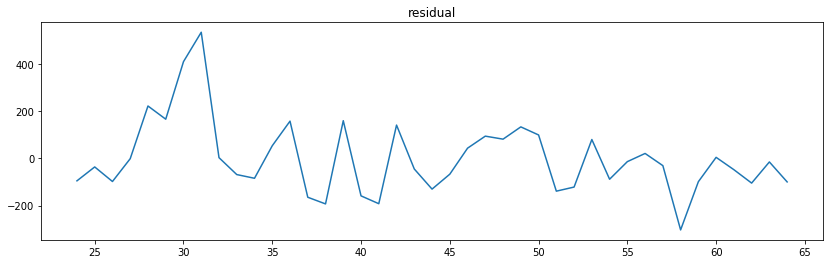

In [11]:
#그럼 이분산성 때문인가?
#reg1의 OLS에는 fittedvalues가 없어서, 원래 쓰던 sm.OLS.로 써봤다. HAC 조정 전임.
#Scatter는 randomely distributed 인 걸로 보임.
reg2 = sm.OLS.from_formula("dependent_t7 ~ dep_t6 + message + test_daily + Transit + traffic + mask", data_drop_row1).fit()
pred_val = reg2.fittedvalues.copy()
true_val = data_drop_row1['dependent_t7'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(14, 4))
ax.scatter(residual, pred_val)
ax.set_title("The scatter plot of residual")

f, axes = plt.subplots(figsize=(14, 4))
axes.plot(residual)
axes.set_title("residual")


In [12]:
#이분산성을 검증하는 방법시도: Breusch-Pagan Lagrange Multiplier test for heteroscedasticity
#출처: https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_breuschpagan.html#statsmodels.stats.diagnostic.het_breuschpagan
#해석: p값이 significant하므로 이분산성이 존재한다.
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residual, data_drop_row1[['dep_t6', 'message', 'traffic', 'Transit', 'mask', 'test_daily']])
pval, f_pval

(0.002799033367189075, 0.001487510380526784)

In [13]:
#따라서 HC1 Type의 Robust Standard Error를 사용
reg = smf.ols('dependent_t7 ~ dep_t6 + message + traffic + Transit + mask + test_daily', data=data_drop_row1)
mdl_1_HAC = reg.fit().get_robustcov_results(cov_type = 'HC1')
print(np.round(mdl_1_HAC.summary2().tables[1], 5))


               Coef.   Std.Err.        t    P>|t|      [0.025      0.975]
Intercept   87.27669  676.04767  0.12910  0.89804 -1286.61748  1461.17087
dep_t6       0.10605    0.22934  0.46240  0.64674    -0.36003     0.57212
message      1.87412    0.87688  2.13727  0.03985     0.09209     3.65615
traffic      0.00003    0.00007  0.46302  0.64630    -0.00011     0.00017
Transit      0.17500    7.81490  0.02239  0.98226   -15.70678    16.05679
mask        -0.05205    0.09329 -0.55798  0.58051    -0.24165     0.13754
test_daily  -0.03424    0.01282 -2.67162  0.01150    -0.06028    -0.00819


In [14]:
#이제 scaling이 완료된 데이터 프레임에, HC1 모델을 적용해보자.

reg = smf.ols('dependent_t7 ~ dep_t6 + message + traffic + Transit + mask + test_daily', data=std_scale)
mdl_1_HAC = reg.fit().get_robustcov_results(cov_type = 'HC1')
print(np.round(mdl_1_HAC.summary2().tables[1], 5))

#이게 우리의 최종 모델이다.



              Coef.  Std.Err.        t    P>|t|   [0.025   0.975]
Intercept   0.00000   0.11881  0.00000  1.00000 -0.24146  0.24146
dep_t6      0.10631   0.22992  0.46240  0.64674 -0.36093  0.57356
message     0.63561   0.29739  2.13727  0.03985  0.03123  1.23998
traffic     0.09717   0.20986  0.46302  0.64630 -0.32932  0.52365
Transit     0.00543   0.24229  0.02239  0.98226 -0.48697  0.49782
mask       -0.10285   0.18433 -0.55798  0.58051 -0.47745  0.27175
test_daily -0.66729   0.24977 -2.67162  0.01150 -1.17488 -0.15970


In [15]:
#그럼 모델 자체에 문제가 있는걸까?
#endogeniety를 확인하기 위해서 Hausman Test를 해보기로 했다.
#우리 교재 1149p있는 것처럼, 직접 만들어서 해봄. 이때 sig.v.(IVs) 는 tdaily랑 message, tdaily_t-1, meesage_t-1.
#그러나 dep_t6의 Hausman Test에 레그값들을 넣으면 dep_t6가 significant하지 않은 문제가 생기므로 레그는 뺀다.
#먼저 dep_t6와 residual 사이에 endogeneity 문제가 있는가?를 보자.

reg_h1 = sm.OLS(endog=std_scale['dep_t6'],
                exog=std_scale[['message', 'test_daily']],
                missing='drop').fit()

std_scale['residual_t6'] = reg_h1.resid


reg_h2 = sm.OLS(endog=std_scale['dependent_t7'],
              exog=std_scale[['dep_t6', 'message', 'test_daily', 'traffic', 'mask', 'Transit', 'residual_t6']],
              missing='drop').fit()

print(reg_h2.summary())

# dep_t6는 model에서 endogeneity 문제가 없다.


                                 OLS Regression Results                                
Dep. Variable:           dependent_t7   R-squared (uncentered):                   0.520
Model:                            OLS   Adj. R-squared (uncentered):              0.438
Method:                 Least Squares   F-statistic:                              6.321
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                    0.000142
Time:                        14:42:57   Log-Likelihood:                         -43.128
No. Observations:                  41   AIC:                                      98.26
Df Residuals:                      35   BIC:                                      108.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [16]:
#Transit의 endogeneity? -> endogeneity가 있다. 

reg_Transit_h1 = sm.OLS(endog=std_scale['Transit'],
                exog=std_scale[['message', 'test_daily', 'message_t-1', 'testdaily_t-1']],
                missing='drop').fit()

std_scale['residual_Transit'] = reg_Transit_h1.resid

reg_Transit_h2 = sm.OLS(endog=std_scale['dependent_t7'],
              exog=std_scale[['dep_t6', 'message', 'test_daily', 'Transit', 'traffic', 'mask', 'residual_Transit']],
              missing='drop').fit()

print(reg_Transit_h2.summary())

                                 OLS Regression Results                                
Dep. Variable:           dependent_t7   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.512
Method:                 Least Squares   F-statistic:                              7.134
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                    2.92e-05
Time:                        14:42:57   Log-Likelihood:                         -39.650
No. Observations:                  41   AIC:                                      93.30
Df Residuals:                      34   BIC:                                      105.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [17]:
#traffic의 endogeneity? -> 있다

reg_traffic_h1 = sm.OLS(endog=std_scale['traffic'],
                exog=std_scale[['message', 'test_daily','message_t-1', 'testdaily_t-1']],
                missing='drop').fit()

std_scale['residual_traffic'] = reg_traffic_h1.resid

reg_traffic_h2 = sm.OLS(endog=std_scale['dependent_t7'],
              exog=std_scale[['dep_t6', 'message', 'test_daily', 'Transit', 'traffic', 'mask', 'residual_traffic']],
              missing='drop').fit()

print(reg_traffic_h2.summary())

                                 OLS Regression Results                                
Dep. Variable:           dependent_t7   R-squared (uncentered):                   0.624
Model:                            OLS   Adj. R-squared (uncentered):              0.547
Method:                 Least Squares   F-statistic:                              8.071
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                    9.06e-06
Time:                        14:42:57   Log-Likelihood:                         -38.107
No. Observations:                  41   AIC:                                      90.21
Df Residuals:                      34   BIC:                                      102.2
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [18]:
#mask의 endogeneity -> endogeneity가 있다.


reg_mask_h1 = sm.OLS(endog=std_scale['mask'],
                exog=std_scale[['message', 'test_daily','message_t-1', 'testdaily_t-1']],
                missing='drop').fit()

std_scale['residual_mask'] = reg_mask_h1.resid

reg_mask_h2 = sm.OLS(endog=std_scale['dependent_t7'],
              exog=std_scale[['dep_t6', 'message', 'test_daily', 'Transit', 'traffic', 'mask', 'residual_mask']],
              missing='drop').fit()

print(reg_mask_h2.summary())


                                 OLS Regression Results                                
Dep. Variable:           dependent_t7   R-squared (uncentered):                   0.619
Model:                            OLS   Adj. R-squared (uncentered):              0.541
Method:                 Least Squares   F-statistic:                              7.893
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                    1.13e-05
Time:                        14:42:57   Log-Likelihood:                         -38.392
No. Observations:                  41   AIC:                                      90.78
Df Residuals:                      34   BIC:                                      102.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [23]:
# Hausman 결과 테이블 화
from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg_h2,reg_Transit_h2,reg_traffic_h2,reg_mask_h2],
float_format='%0.2f',
stars = True,
model_names=['dep_t6',
'Transit',
'traffic',
'mask'],
info_dict=info_dict,
regressor_order=['dep_t6', 'message', 'test_daily', 'Transit', 'traffic', 'mask', 'residual_t6', 'residual_Transit', 'residual_traffic', 'residual_mask'])
results_table.add_title('Table 1 - Hausman Tests')
print(results_table)

              Table 1 - Hausman Tests
                  dep_t6  Transit traffic    mask  
---------------------------------------------------
dep_t6           0.32***  0.06    0.26     0.27    
                 (0.10)   (0.22)  (0.22)   (0.22)  
message          0.44***  1.08*** 1.37***  0.76*** 
                 (0.16)   (0.33)  (0.36)   (0.27)  
test_daily       -0.62*** -0.46** -1.04*** -1.07***
                 (0.18)   (0.19)  (0.20)   (0.21)  
Transit          0.01     0.69*   -0.18    -0.15   
                 (0.26)   (0.36)  (0.24)   (0.24)  
traffic          0.10     0.18    1.76***  0.13    
                 (0.21)   (0.19)  (0.57)   (0.19)  
mask             -0.10    -0.11   -0.18    0.91**  
                 (0.18)   (0.17)  (0.16)   (0.38)  
residual_t6      -0.22                             
                 (0.17)                            
residual_Transit          -0.98**                  
                          (0.39)                   
residual_traffic          

In [25]:
#따라서 Transit, traffic, mask에 대해 2SLS 시행
# 2SLS 1st stage_Transit
stage_1_Transit = sm.OLS(endog=data_drop_row1['Transit'],
exog=data_drop_row1[['Transit_t1','dep_t6', 'message', 'test_daily']],
missing='drop').fit()
data_drop_row1['predict_Transit'] = stage_1_Transit.predict()
print(stage_1_Transit.summary())

# 2SLS 1st stage_traffic #
stage_1_traffic = sm.OLS(endog=data_drop_row1['traffic'],
exog=data_drop_row1[['traffic_t1','dep_t6', 'message', 'test_daily']],
missing='drop').fit()
data_drop_row1['predict_traffic'] = stage_1_traffic.predict()
print(stage_1_traffic.summary())

# 2SLS 1st stage_mask #
stage_1_mask = sm.OLS(endog=data_drop_row1['mask'],
exog=data_drop_row1[['mask_t1','dep_t6', 'message', 'test_daily']],
missing='drop').fit()
data_drop_row1['predict_mask'] = stage_1_mask.predict()
print(stage_1_mask.summary())

                                 OLS Regression Results                                
Dep. Variable:                Transit   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1538.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                    1.43e-40
Time:                        14:45:07   Log-Likelihood:                         -133.42
No. Observations:                  41   AIC:                                      274.8
Df Residuals:                      37   BIC:                                      281.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gu

In [26]:
#1st stage에서 만든 값들을 다시 Standard Scaling을 하고 robust standard error (HC1)을 적용해보자.

from sklearn.preprocessing import StandardScaler
from statsmodels.iolib.summary2 import summary_col

df1 = data_drop_row1

std_scaler = StandardScaler()
std_scale = std_scaler.fit_transform(df1)
std_scale = pd.DataFrame(std_scale, columns = df1.columns, index=list(df1.index.values))

#이제 scaling이 완료된 데이터 프레임에, HC1 모델을 적용해보자.

reg_final = smf.ols('dependent_t7 ~ dep_t6 + message + test_daily + predict_Transit +predict_traffic + predict_mask ', data=std_scale)
reg_final_HAC = reg_final.fit().get_robustcov_results(cov_type = 'HC1')
result_1 = np.round(reg_final_HAC.summary2().tables[1], 5)

reg_final_notraffic = smf.ols('dependent_t7 ~ dep_t6 + message + test_daily + predict_Transit + predict_mask + test_daily', data=std_scale)
reg_final_notraffic_HAC = reg_final_notraffic.fit().get_robustcov_results(cov_type = 'HC1')
result_2 = np.round(reg_final_notraffic_HAC.summary2().tables[1], 5)

info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table2 = summary_col(results=[reg_final_HAC, reg_final_notraffic_HAC],
float_format='%0.2f',
stars = True,
model_names=['(1)',
'(2)'],
info_dict=info_dict,
regressor_order=['dependent_t7', 'dep_t6', 'message', 'test_daily', 'predict_Transit', 'predict_traffic', 'predict_mask'])
results_table2.add_title('Table 2 - 2SLS results')
print(results_table2)

    Table 2 - 2SLS results
                   (1)    (2)  
-------------------------------
dep_t6           -0.01   -0.06 
                 (0.18)  (0.22)
message          0.89*** 0.89**
                 (0.32)  (0.34)
test_daily       -0.55*  -0.50*
                 (0.29)  (0.25)
predict_Transit  0.24    0.35* 
                 (0.25)  (0.20)
predict_traffic  0.18          
                 (0.20)        
predict_mask     -0.23   -0.18 
                 (0.16)  (0.13)
Intercept        0.00    0.00  
                 (0.11)  (0.11)
R-squared        0.57    0.56  
No. observations 41      41    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
data_drop_row1['dependent_t7']

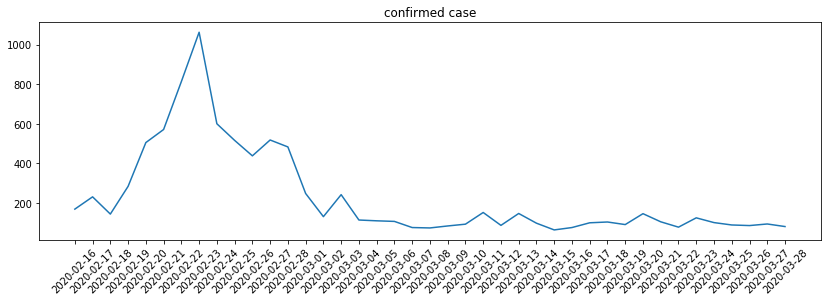

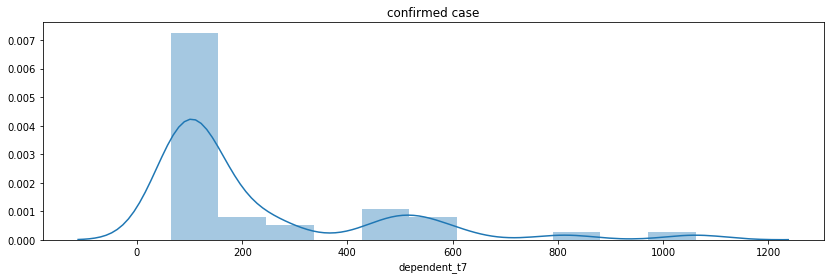

confirmed case
mean of left group, right group: 368.1, 98.80952380952381
std of left group, right group: 265.8159038448266, 24.46552482089654


In [21]:
#그럼 stationary 하지 않은 건가? stationary를 보는 방법 2가지 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

time_data = data['time']
time_data
time = time_data.tail(41)
time


## 1) just plotting 
f, axes = plt.subplots(figsize=(14, 4))
axes.plot(time, data_drop_row1['dependent_t7'])
axes.set_title("confirmed case")
plt.xticks(rotation = 45)

## 2) plot histogram to check to follow gaussian dist. 
f, axes = plt.subplots(figsize=(14, 4))
sns.distplot(data_drop_row1['dependent_t7'])
axes.set_title("confirmed case")

plt.show()

## 3) mean variance comparision 
print("confirmed case")
print("mean of left group, right group: {}, {}".format(
    data_drop_row1['dependent_t7'][:len(data_drop_row1['dependent_t7'])//2].mean(), data_drop_row1['dependent_t7'][len(data_drop_row1['dependent_t7'])//2:].mean())
)
print("std of left group, right group: {}, {}".format(
    data_drop_row1['dependent_t7'][:len(data_drop_row1['dependent_t7'])//2].std(), data_drop_row1['dependent_t7'][len(data_drop_row1['dependent_t7'])//2:].std())
)

#흠.. 근데 여기서는 Stationary 하지 않은 것으로 보인단 말이지.. 너무 왼쪽에 편중돼 있으니까 왼쪽이랑 오른쪽이랑 Mean이랑 Std가 넘다름.


In [20]:
#그러나 다음 TEST를 시행해보면,
#Augmented Dickey-Fuller Test 시행 -> Stationary 확보

from statsmodels.tsa.stattools import adfuller

def print_adfuller(inputSeries):
    result = adfuller(inputSeries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

df_dep_t7 = data_drop_row1['dependent_t7']

        
print_adfuller(df_dep_t7)
print("--------")

ADF Statistic: -4.776333
p-value: 0.000060
Critical Values:
	1%: -3.661
	5%: -2.961
	10%: -2.619
--------


In [70]:
#수동으로 ADF 해보자.
#Insignificant한데..? 
#만약 Insignificant하면 lagged variables를 계속 넣어서 stationary 확보되기까지 넣어야하는디..

delta_df = np.diff(df_dep_t7)

lagged = data_drop_row1['dep_t6']

lagged_1 = lagged.drop(64)
lagged_1

lagged_1



from pandas import DataFrame as df

df_adf = df(data = {'dleta_df' : delta_df, 'lagged_1' : lagged_1})
df_adf

df_adf['const'] = 1
df_adf

reg_adf = smf.ols('delta_df ~ const + lagged_1', data = df_adf).fit()
print(reg_adf.summary())



                            OLS Regression Results                            
Dep. Variable:               delta_df   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.780
Date:                Tue, 09 Jun 2020   Prob (F-statistic):              0.190
Time:                        15:13:32   Log-Likelihood:                -246.85
No. Observations:                  40   AIC:                             497.7
Df Residuals:                      38   BIC:                             501.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0893     13.638      0.886      0.3

-1.3539305178355567e-16

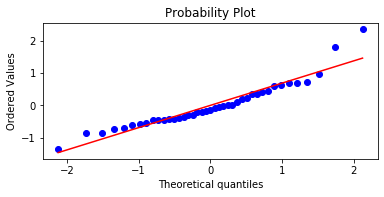

In [71]:
#이제 OLS의 가정들이 충족됐는지 확인해보자. 먼저 Normality를 보기 위해 QQplot과 Residual mean의 크기를 보자

# 잔차항 만들기 #
e   = reg.fit().resid

#플랏 그리기 #
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_,(__, ___, r) = sp.stats.probplot(e, plot=ax, fit=True)

#Residual mean 보기

np.mean(e)

# QQ plot이 outlier를 제외하고 QQ line을 중심으로 이쁘게 그려지고, residual mean도 매우 작아 0에 가까우므로 Normality가 만족된 것으로 본다.

Linearity를 충족하기 위해서는 Normality, Autocorrelation, Condition Number가 충족되어야 한다.
이때 Normality는 바로 위에서 보여지는 것처럼 해결 됐으며, Autocorrelation은 lag1, 즉 dependent_t6에 대한 Hausman Test가 endogneity를 만족하므로 없는 것으로 간주한다. 또한 Condition Number도 6.42로 아주 작으므로 위 세 조건이 모두 만족한다.
즉 Linearity가 충족되며, 시계열 분석에서 검증되어야 할 모든 부문이 확인됐으므로 유의미한 분석이 된다.